In [1]:
!which python

/c/Users/junec/AppData/Local/Programs/Python/Python38/python


In [2]:
import struct 
struct.calcsize("P")*8

32

In [3]:
# !pip list

In [4]:
# !pip install openpyxl
#!pip install Shapely
#!pip install descartes

In [5]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
from operator import itemgetter
from typing import Callable, Dict, List, Set, Tuple

In [13]:
from util import calculate_derivative,pointInterval_to_pressure,timeInterval_to_sub_df
from baseline import detect_breakpoints_startPoint, detect_breakpoints, detect_breakpoints_2, detect_breakpoints_3,detect_breakpoints_4,detect_breakpoints_startPoint2
from plot import PlotNSave
from data_load_N_preprocess import LoadNPreprocessData
# from plot2 import group_index, plot_breakpoints,plot_4_metrics,plot_4_metrics_details,plot_detection_statistics,plot_histogram

In [7]:
#experiment setup
ground_truth=[107, 164, 243, 328, 375, 446, 644, 713, 771, 820, 887, 953, 1036, 1101, 1179, 1254, 1319, 1396, 1456, 1513, 1598, 1648, 1719, 1784, 1875, 1938, 2017, 2073, 2185, 2247, 2315, 2369, 2433, 2487, 2552, 2610, 2835, 2916, 2965, 3044, 3101, 3240, 3284, 3368, 3411]
print(len(ground_truth))
# colum_names ={"pressure":{"Date","Pressure (psia)","first_order_derivative","second_order_derivative"},
#                     "rate":{"Time@end","Liquid rate (STB/D)"}}

colum_names={"pressure":{"time":"Date",
                        "measure":"Pressure (psia)",
                        "first_order_derivative":"first_order_derivative",
                        "second_order_derivative":"second_order_derivative"},
             "rate":{"time":"Time@end",
                     "measure":"Liquid rate (STB/D)"}}
data_inOneRow=400
pressure_filePath="../data_input/Synthetic_Data.xlsx"
rate_filePath="../data_input/Synthetic_Data.xlsx"

45


In [11]:
processed_data=LoadNPreprocessData(pressure_filePath=pressure_filePath, 
                 rate_filePath=rate_filePath, 
                 colum_names=colum_names, 
                 use_SG_smoothing=False)
pressure_df=processed_data.pressure_df
rate_df=processed_data.rate_df

display(pressure_df)
display(rate_df)

first_order_derivative=pressure_df["first_order_derivative"]
second_order_derivative=pressure_df["second_order_derivative"]

---load data from 'txt' or 'xlsx' files...
---The first & second order derivative has been calculated and appended to pressure dataframe


,Date,Pressure (psia),first_order_derivative,second_order_derivative
0,0.000000,2000.000000,15175.401994,-1.593896e+06
1,0.006111,2092.738568,5434.926885,-2.211251e+05
2,0.012222,2125.952010,4083.606969,-1.648675e+05
3,0.018056,2149.773050,3121.879672,-7.945161e+04
4,0.024167,2168.851204,2636.342081,-5.537004e+04
...,...,...,...,...
3514,5938.051389,2327.338989,-0.150989,1.763948e-04
3515,5968.345556,2322.764893,-0.145646,1.653610e-04
3516,5998.640000,2318.352641,-0.140636,1.544522e-04
3517,6028.934444,2314.092149,-0.135957,0.000000e+00


,Time@end,Liquid rate (STB/D)
0,0.000000,-6742.395145
1,253.216667,-8513.514104
2,264.358333,0.000000
3,274.191667,-5548.484464
4,296.716667,-8951.244013
...,...,...
90,4465.793056,0.107707
91,4465.834722,0.105123
92,4465.909722,-1909.311284
93,5058.868056,-5453.279913


,Time@end,Liquid rate (STB/D)
66,3135.618333,-8943.319197
67,3136.701667,-2166.454130


,Date,Pressure (psia),first_order_derivative,second_order_derivative
2696,3135.247222,4489.018528,0.238560,-1.152331e-03
2697,3135.432778,4489.062794,0.238346,-8.220173e+04
2698,3135.618333,4489.107021,-15252.748665,1.559480e+06
2699,3135.624444,4395.895779,-5722.594128,3.094138e+05
2700,3135.630278,4362.513980,-3917.680337,1.469570e+05
2701,3135.636389,4338.572600,-3019.609641,7.689930e+04
2702,3135.645000,4312.570406,-2357.421223,4.421968e+04
2703,3135.657500,4283.102641,-1804.675243,2.397624e+04
2704,3135.675833,4250.016928,-1365.110874,1.258390e+04
2705,3135.702778,4213.234774,-1026.044625,6.677644e+03


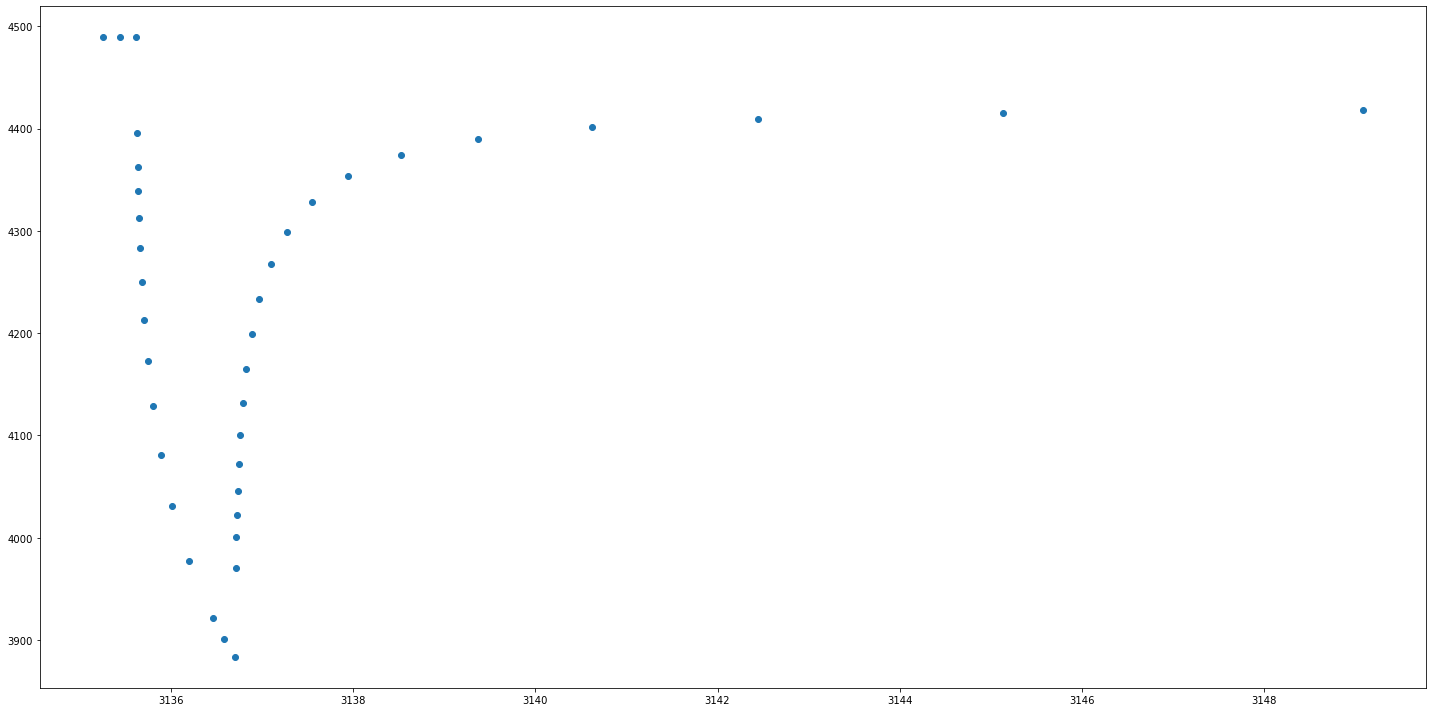

In [19]:
plt.figure(figsize = (20, 10))
a,b=timeInterval_to_sub_df(3110,3150,pressure_df,rate_df,colum_names)
display(a,b)
x=b["Date"]
y=b["Pressure (psia)"]
plt.scatter(x=x,y=y)

---initializing...
---plotting...
detected 45 points as breakpoints
The plot is devided into 9 rows
------row 1-----detected points:[107, 164, 243, 328, 375]


findfont: Font family ['Arial Black'] not found. Falling back to DejaVu Sans.


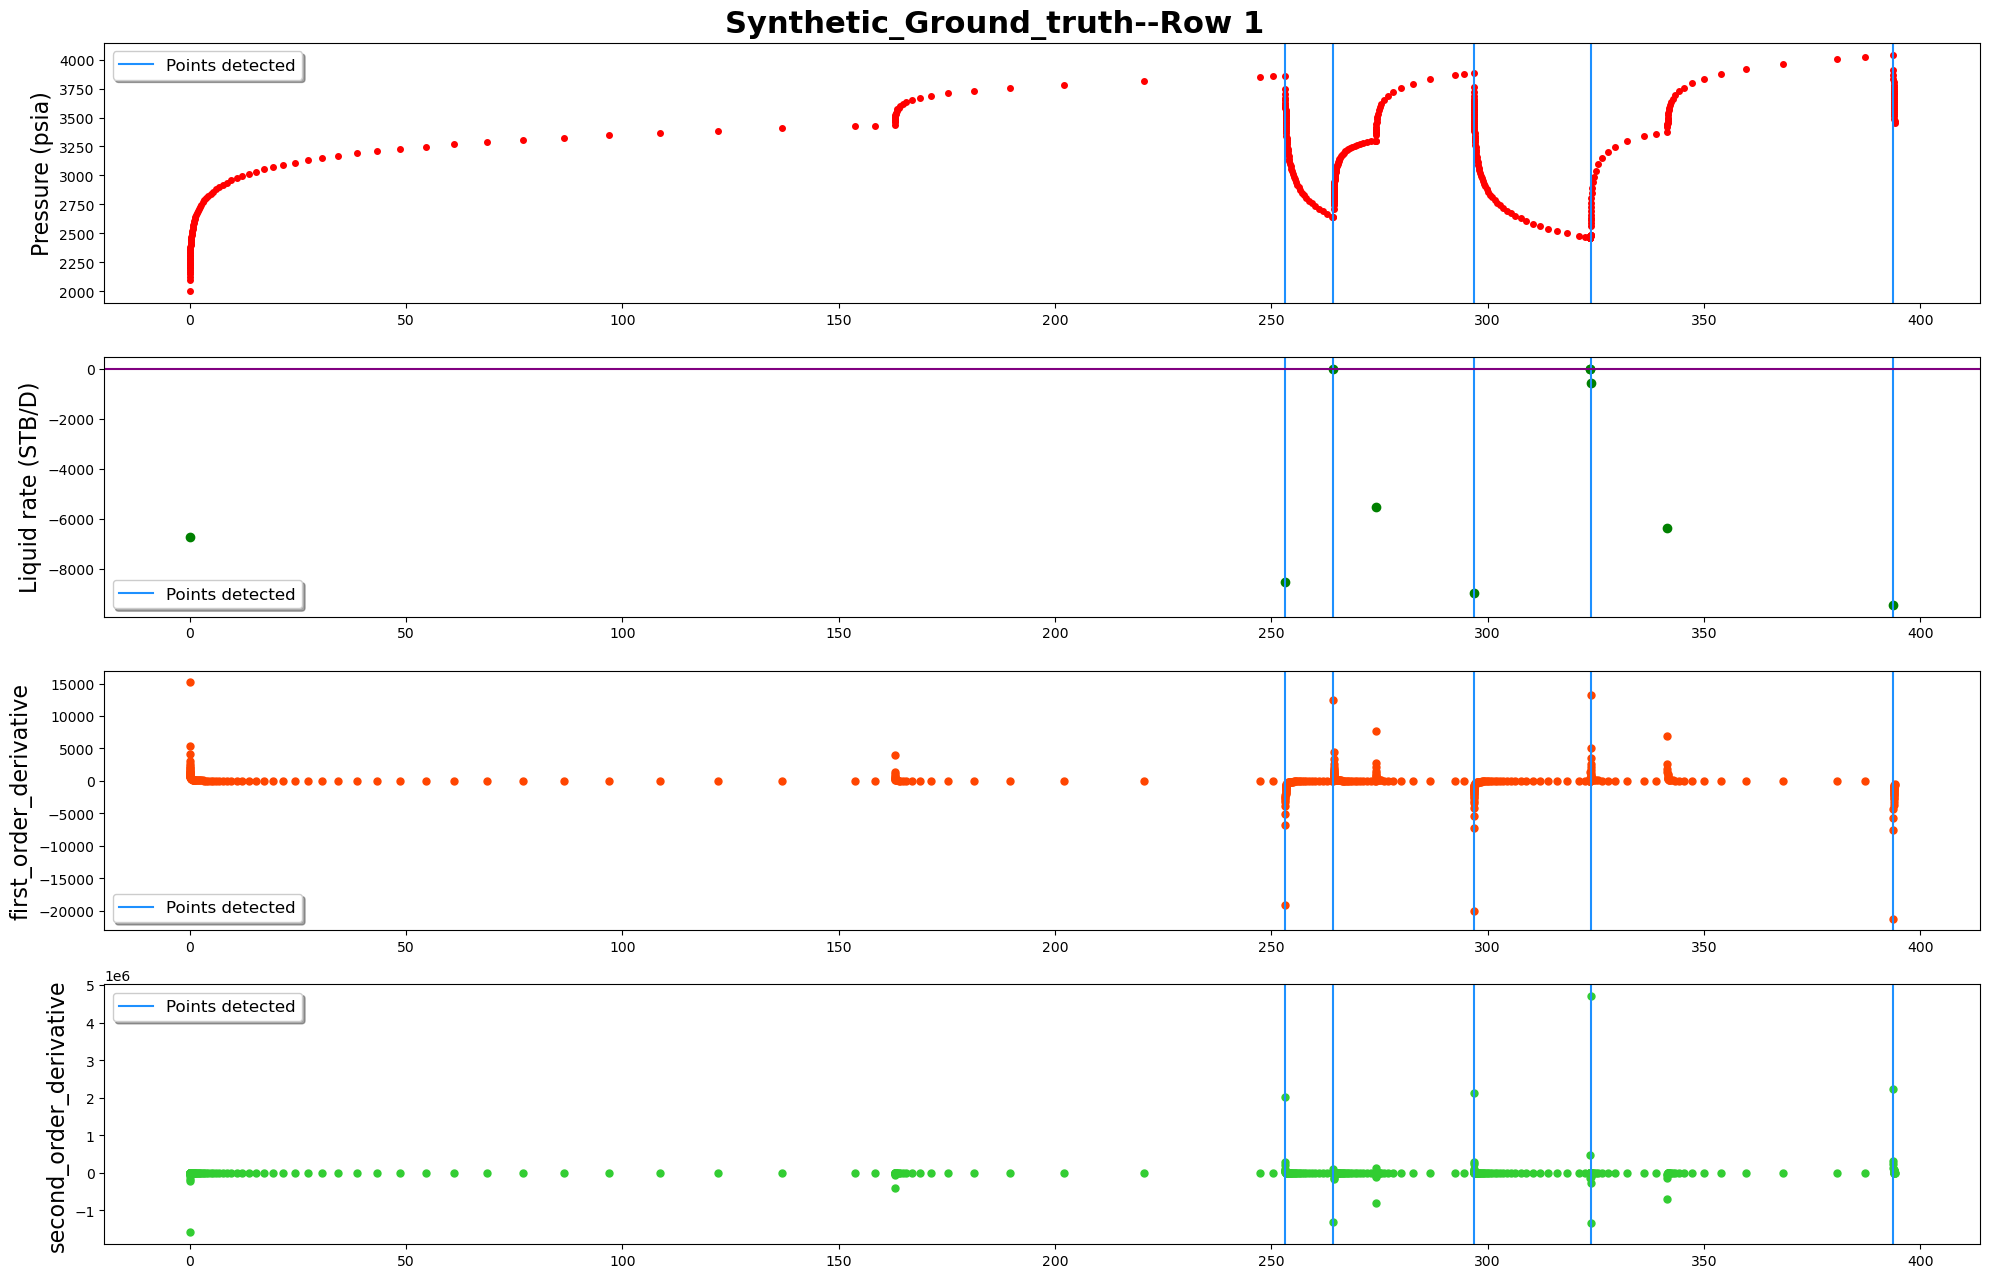

------row 2-----detected points:[446, 644, 713, 771]


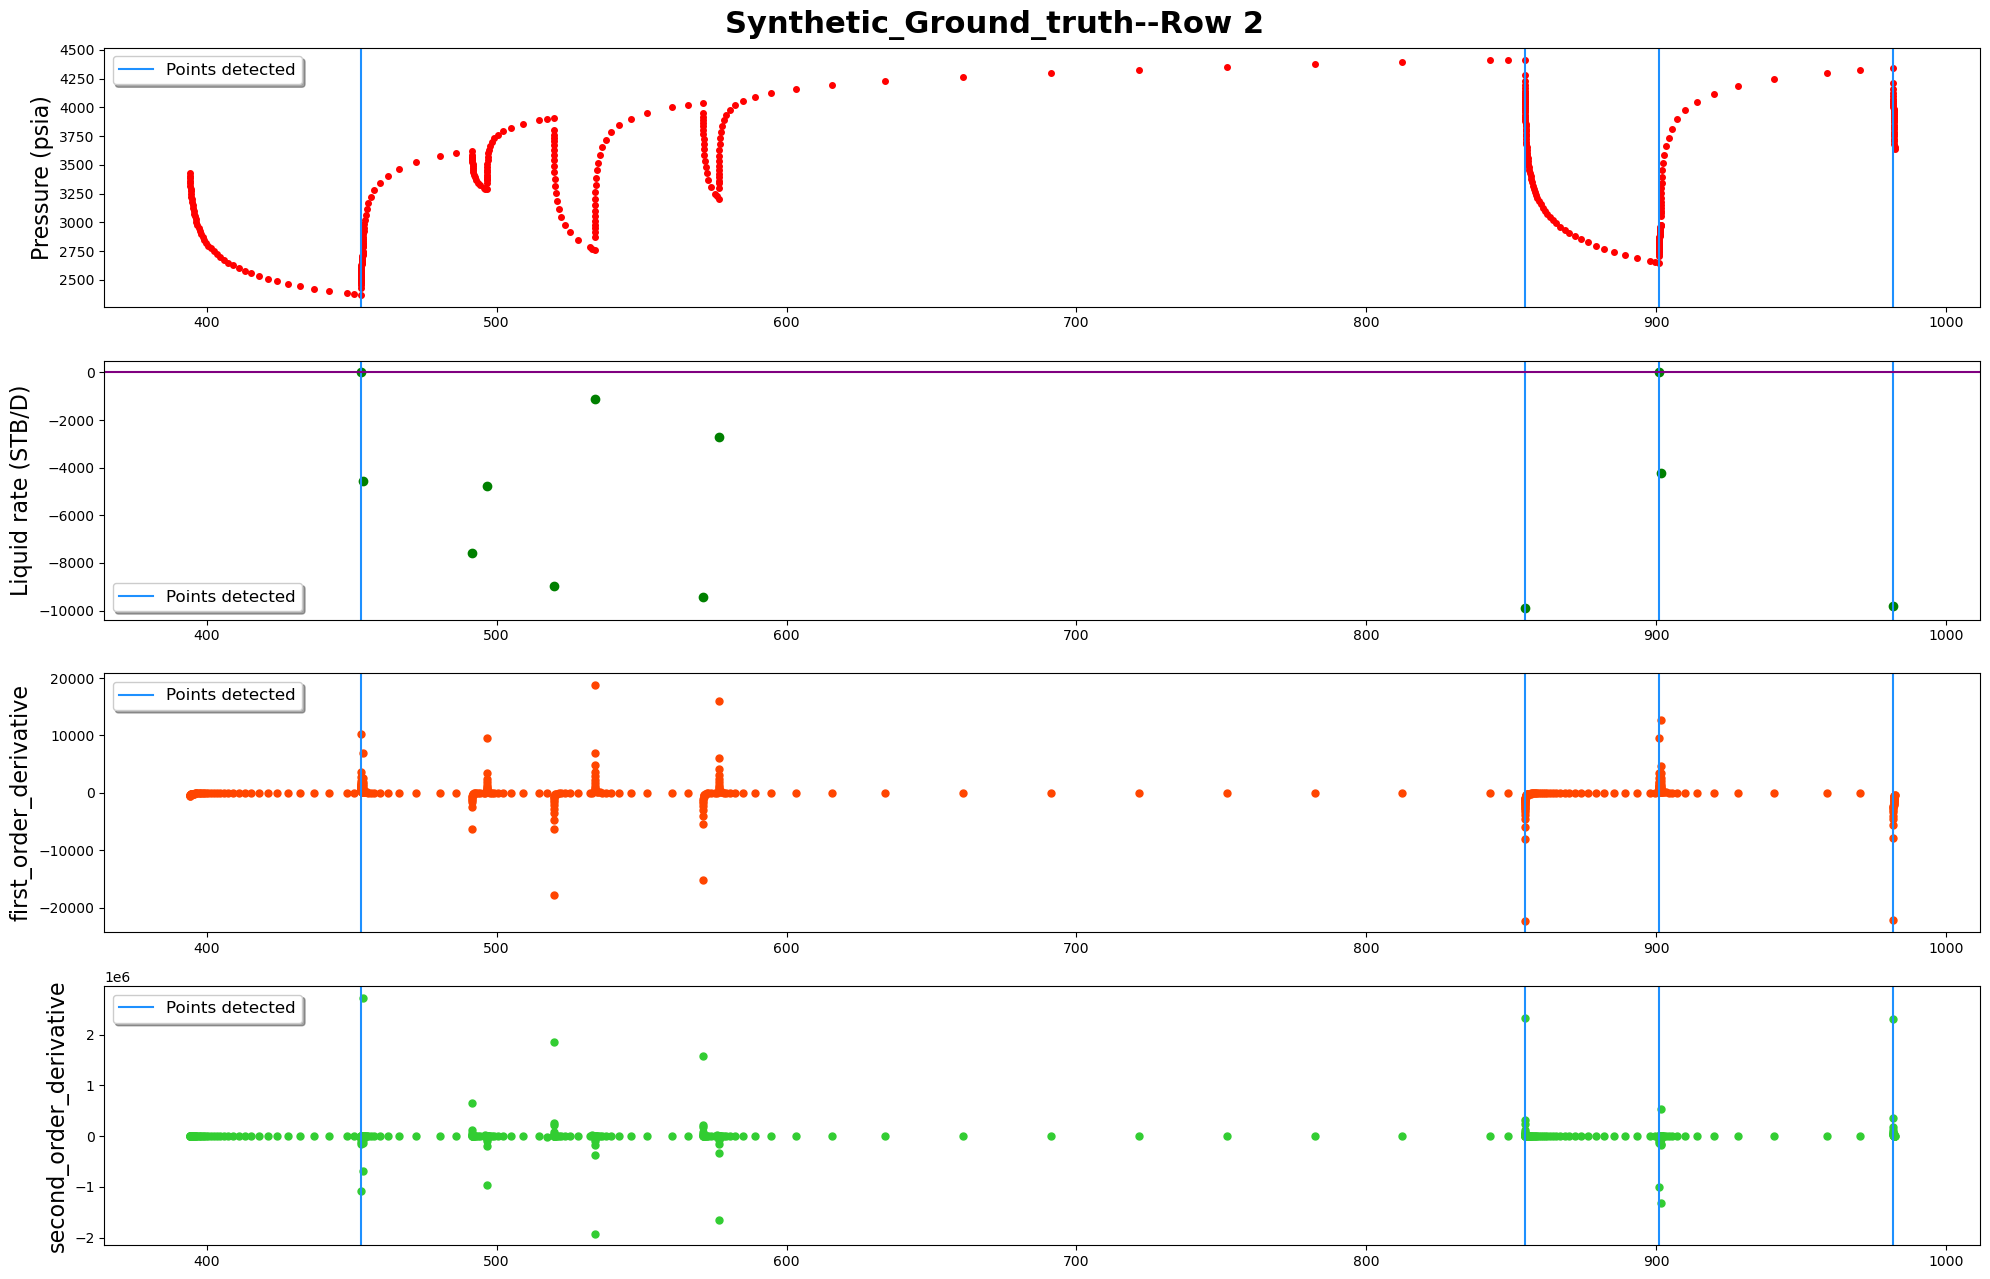

------row 3-----detected points:[820, 887, 953, 1036, 1101, 1179]


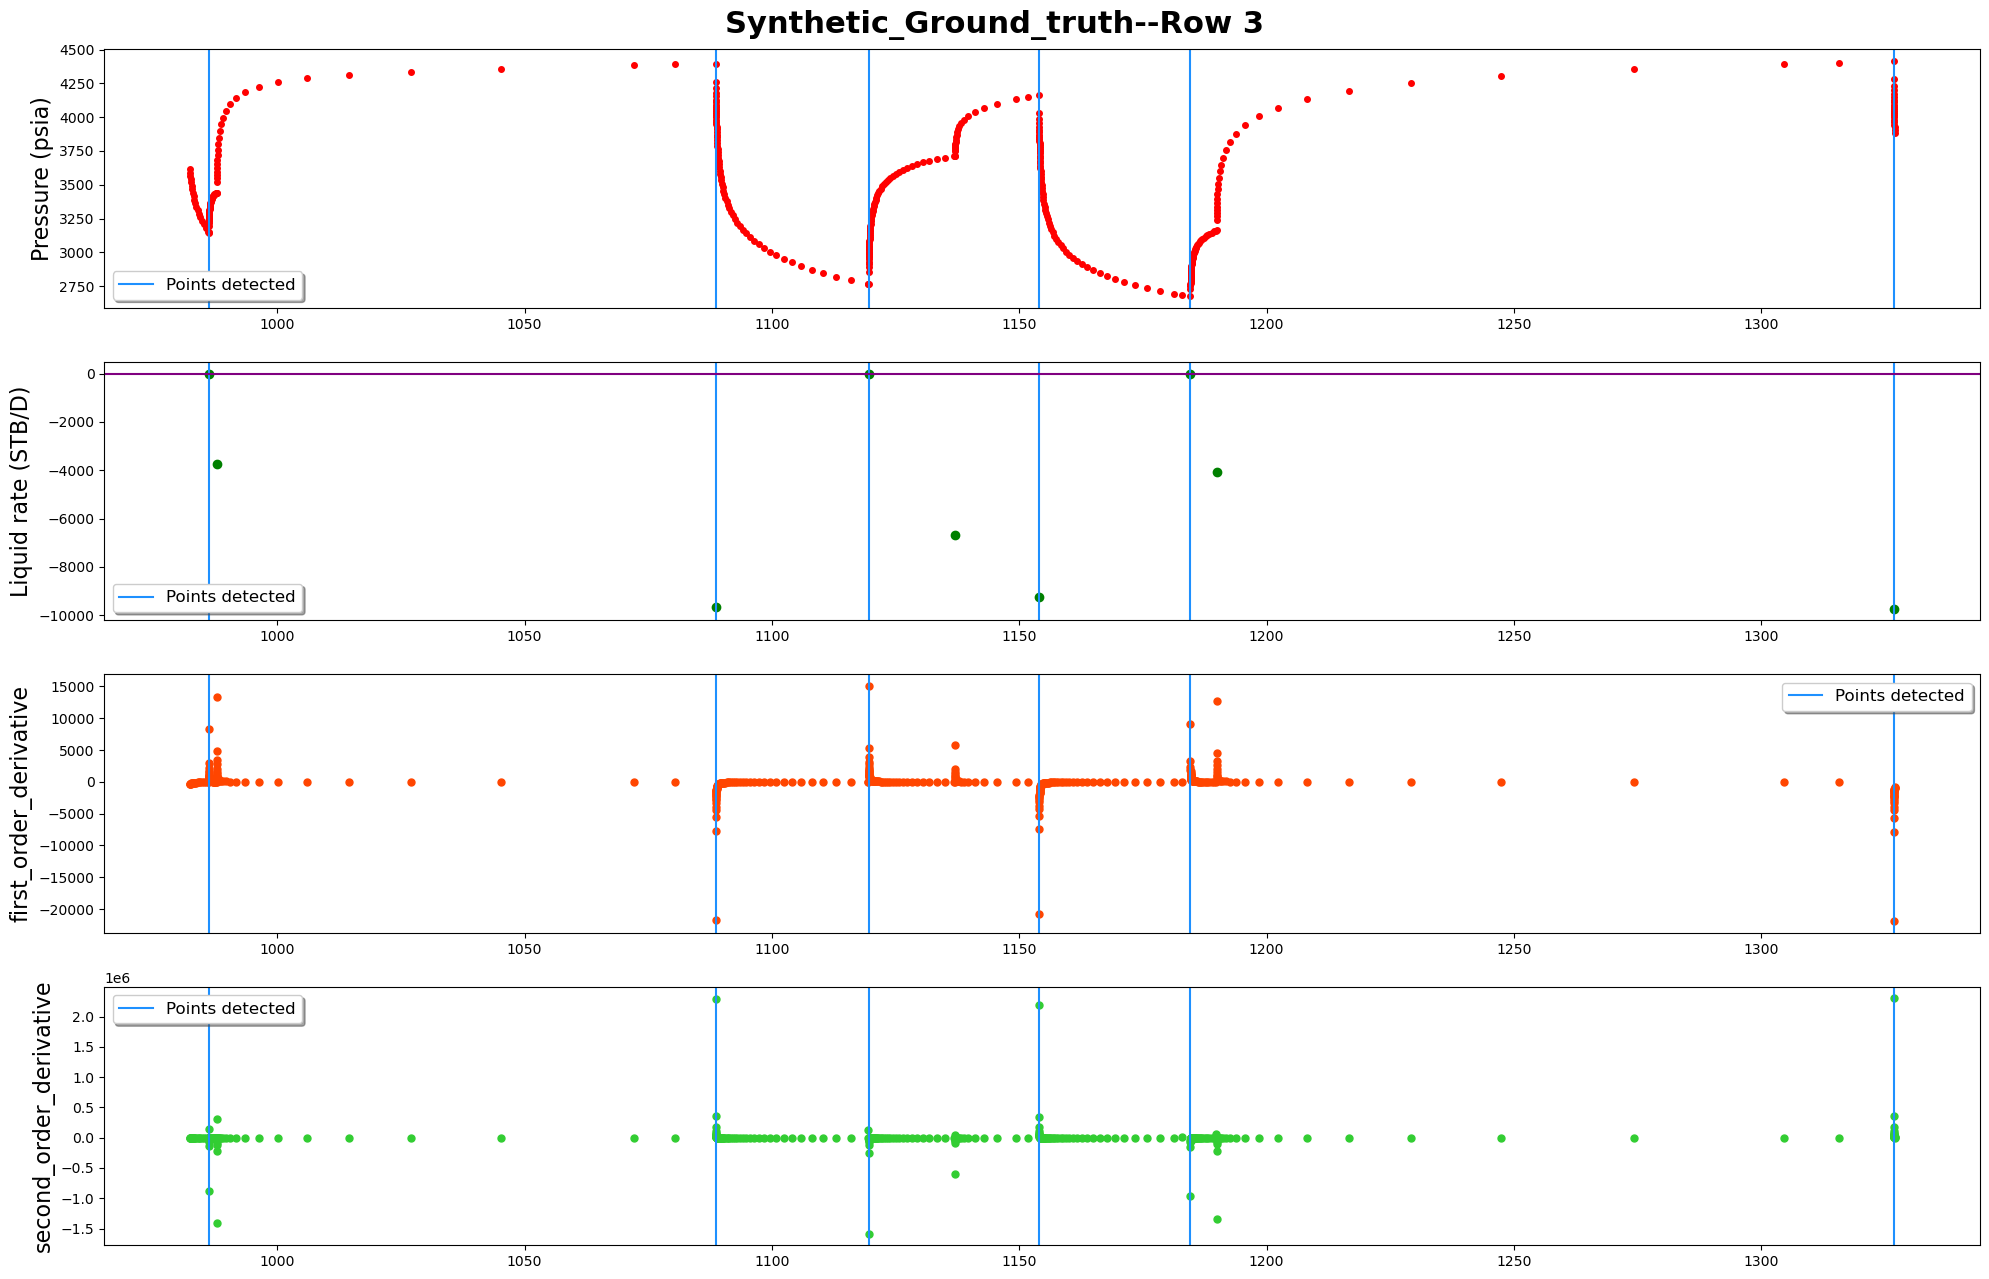

------row 4-----detected points:[1254, 1319, 1396, 1456, 1513, 1598]


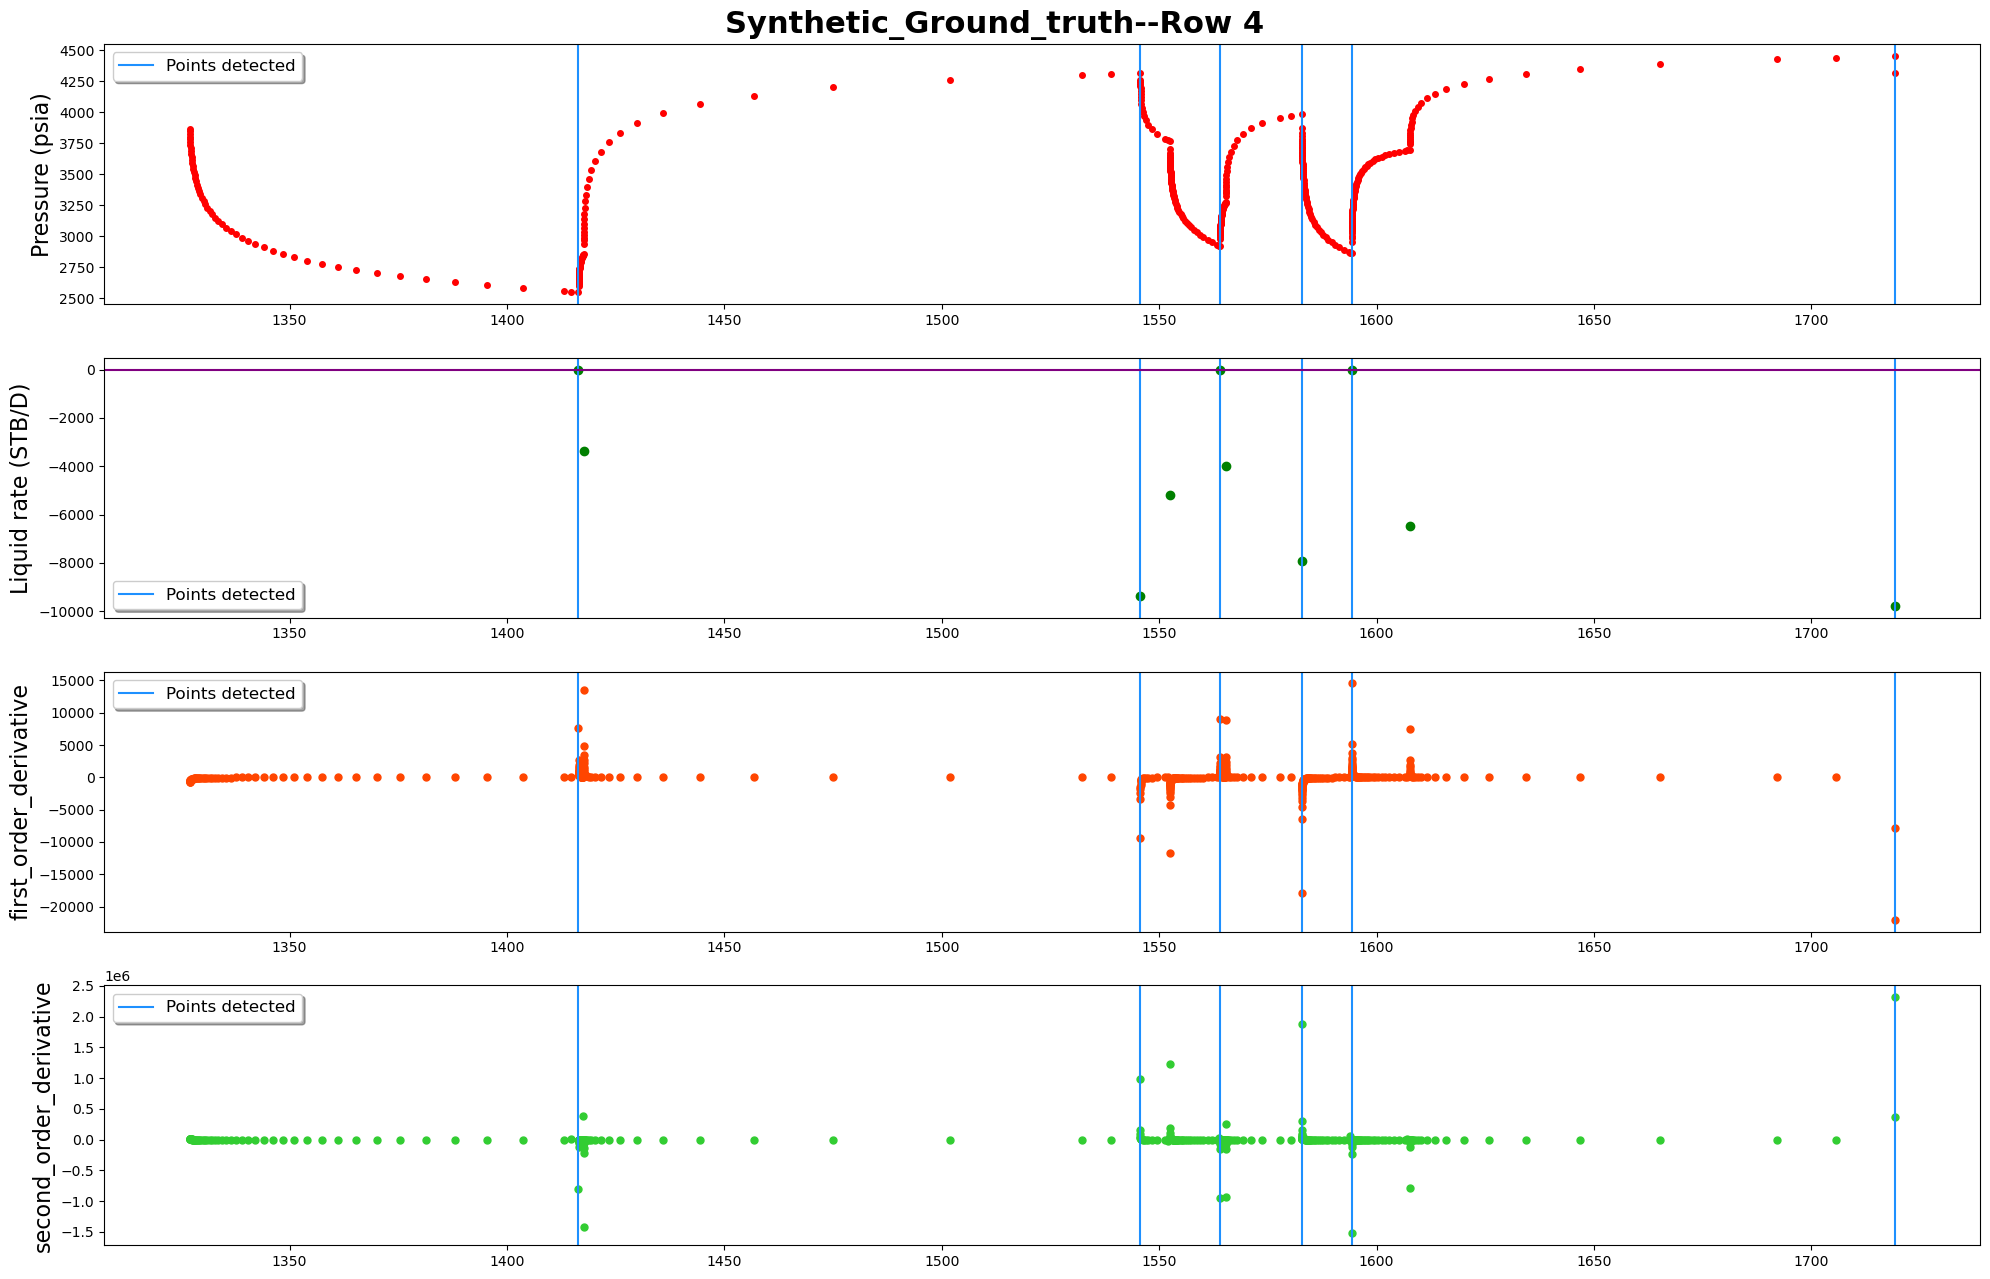

------row 5-----detected points:[1648, 1719, 1784, 1875, 1938]


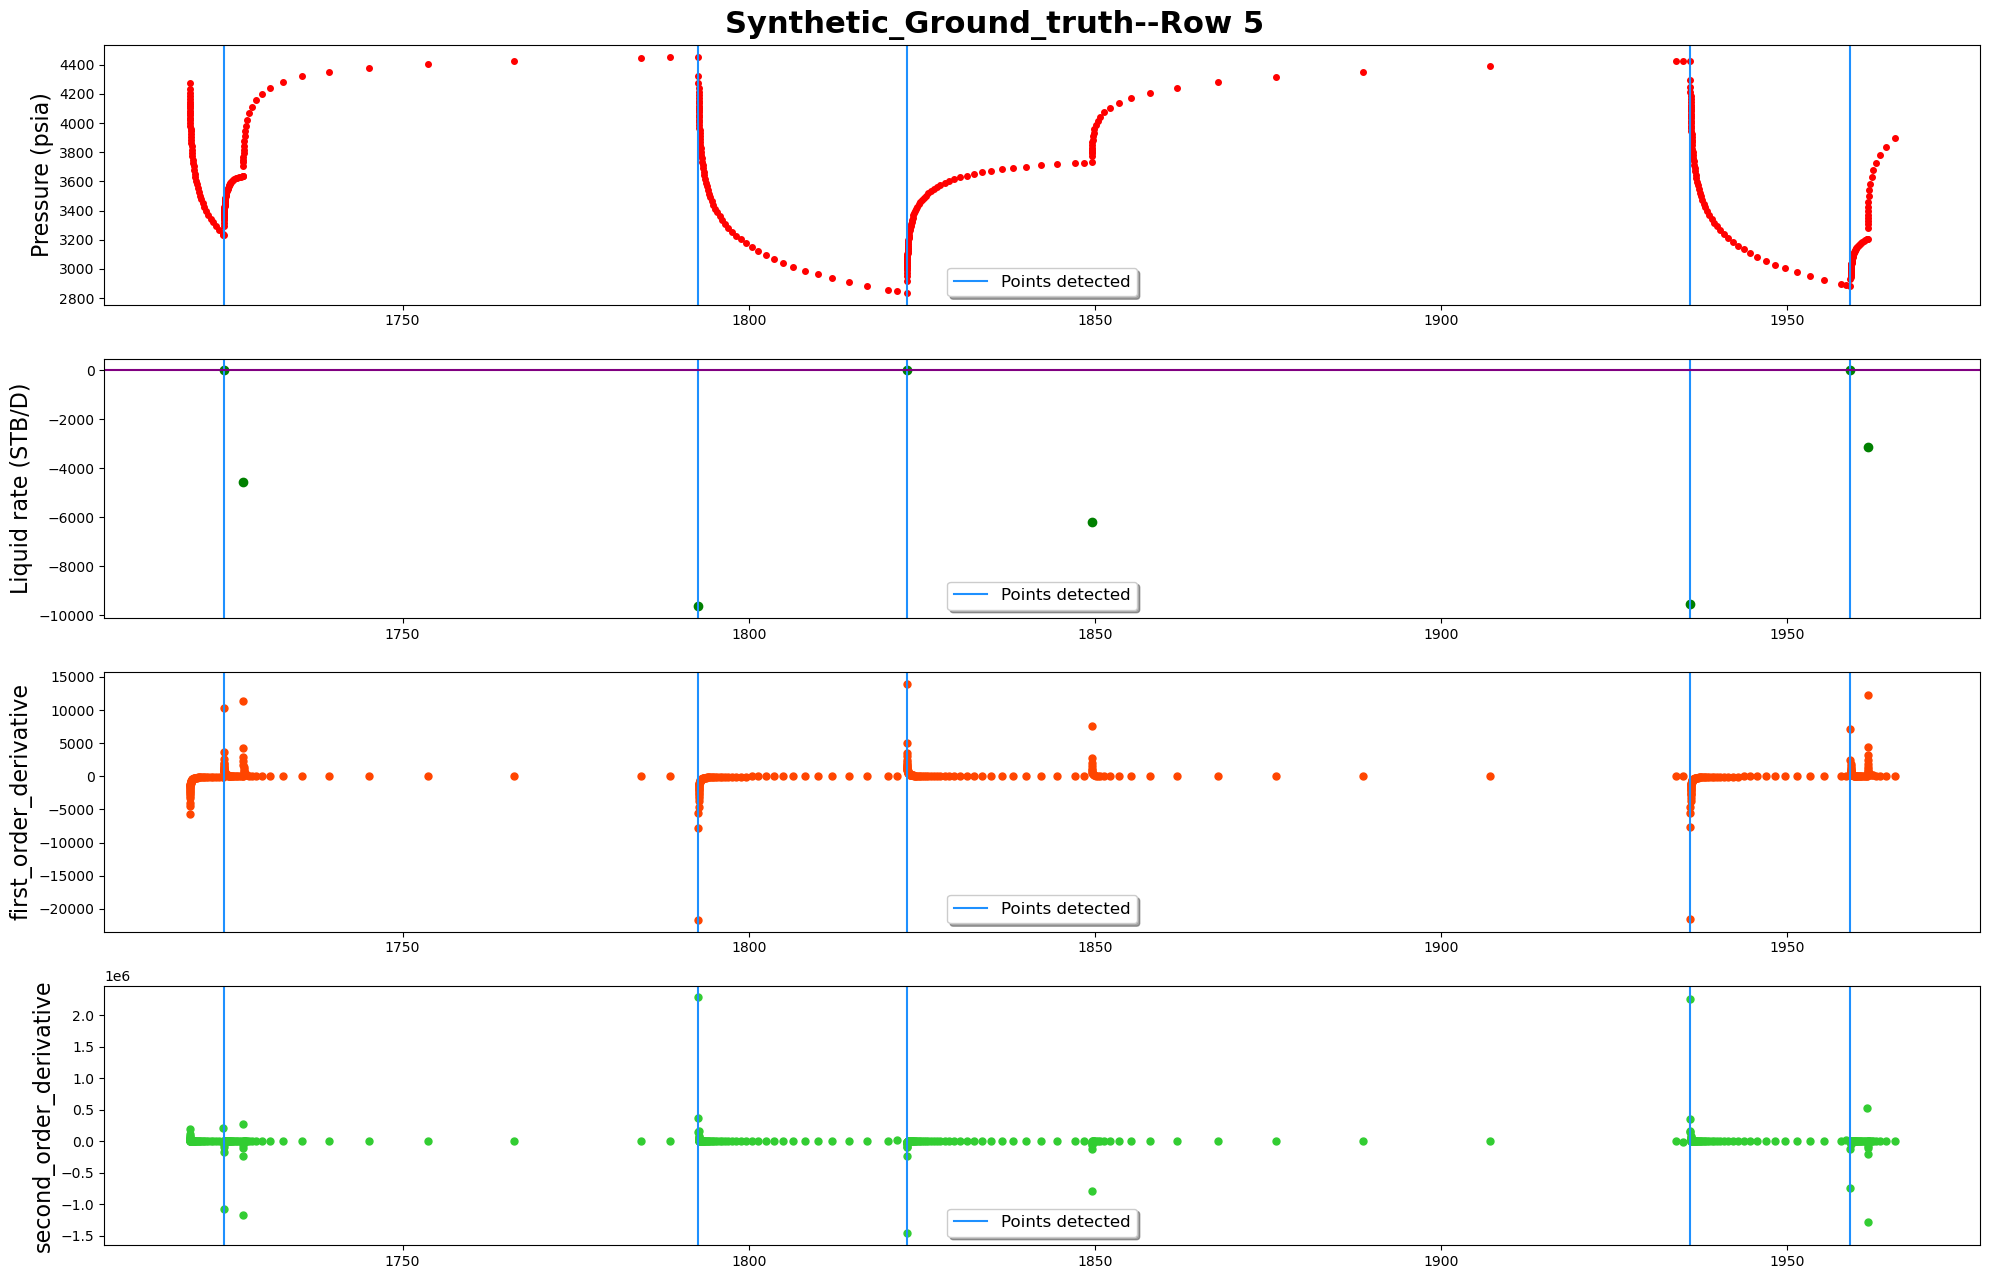

------row 6-----detected points:[2017, 2073, 2185, 2247, 2315, 2369]


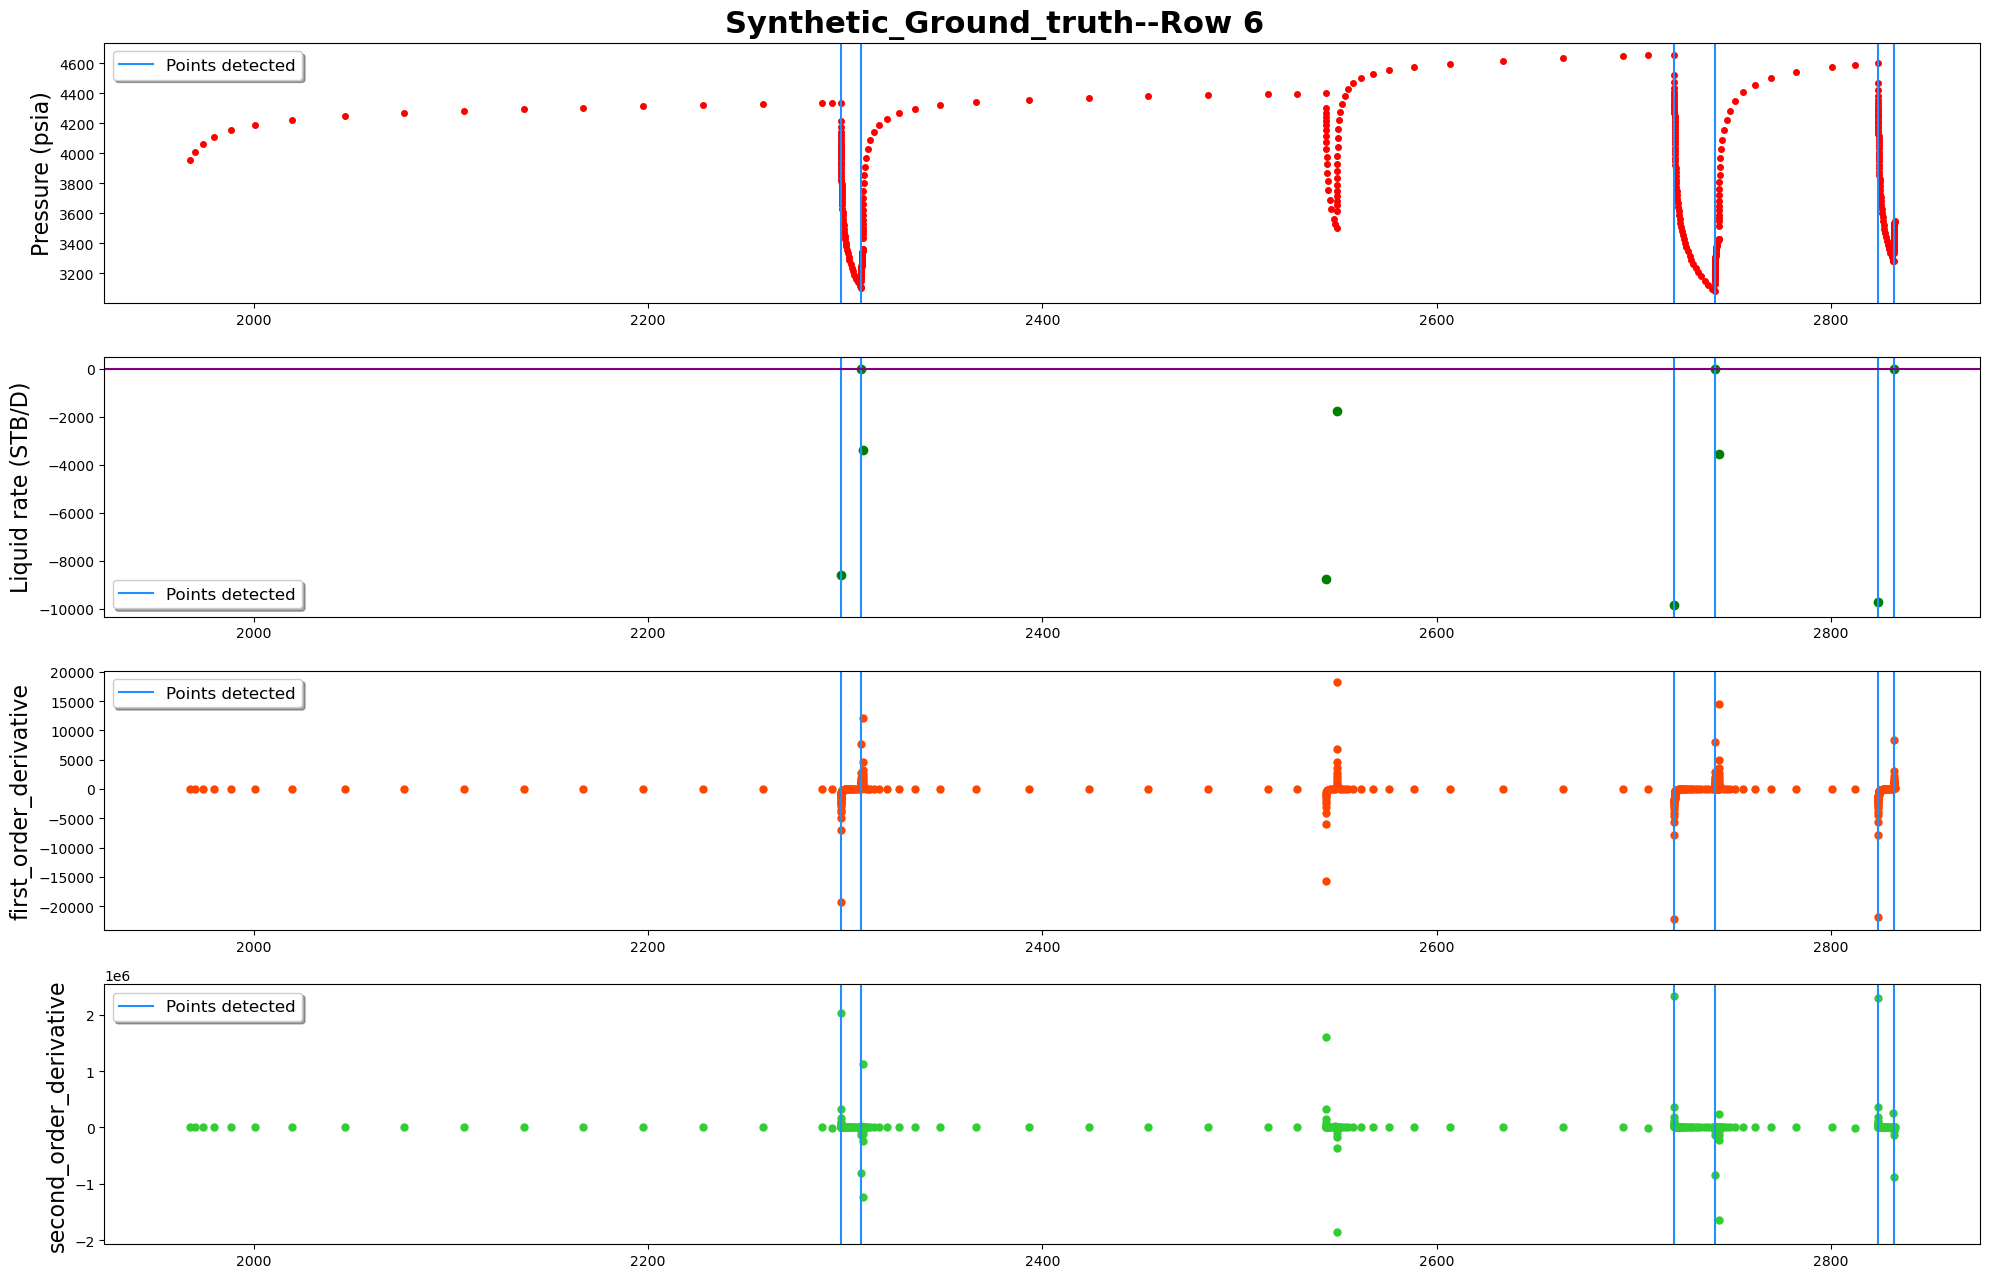

------row 7-----detected points:[2433, 2487, 2552, 2610]


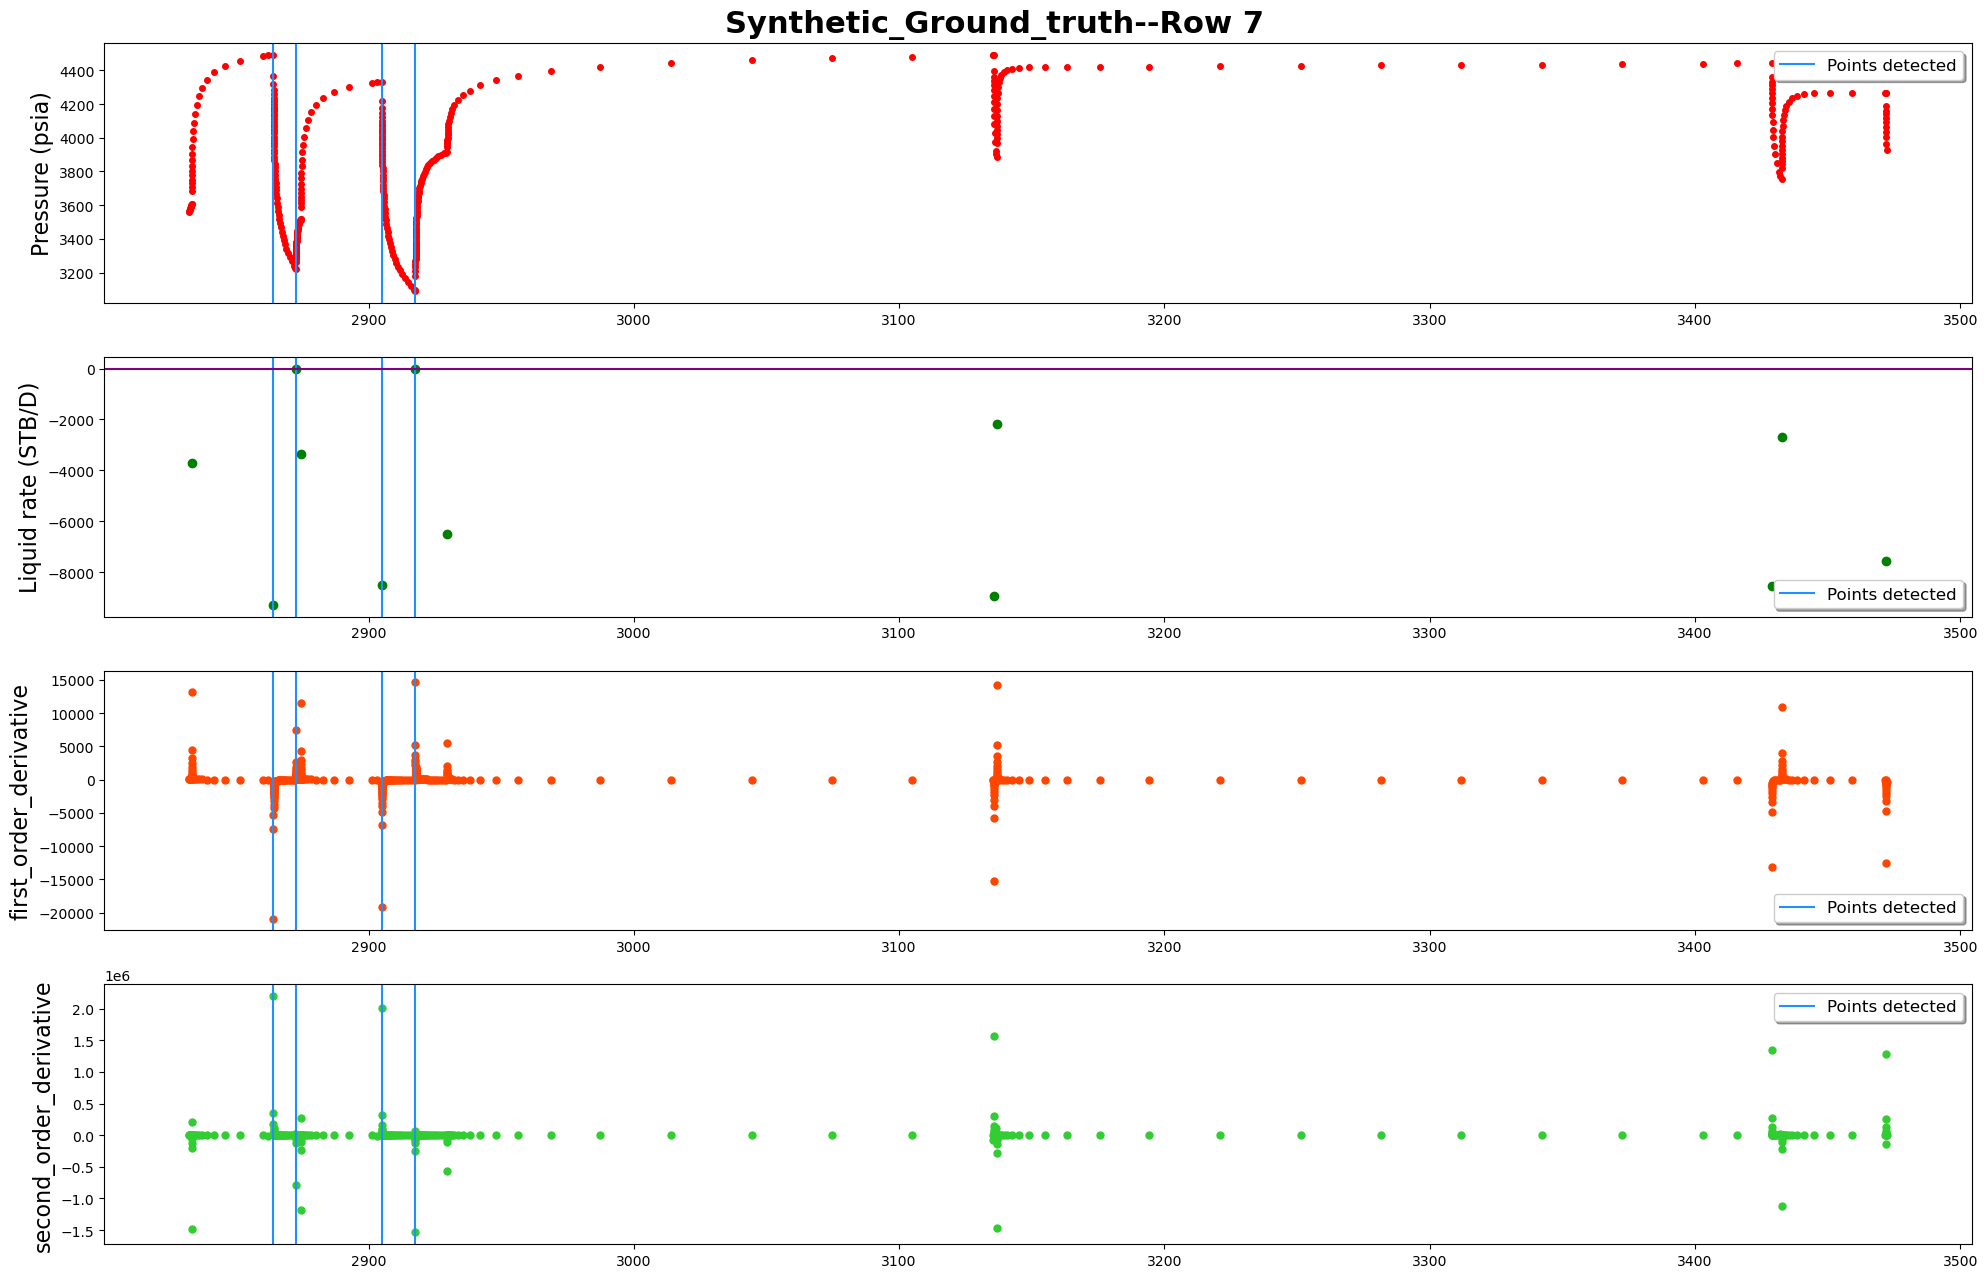

------row 8-----detected points:[2835, 2916, 2965, 3044, 3101]


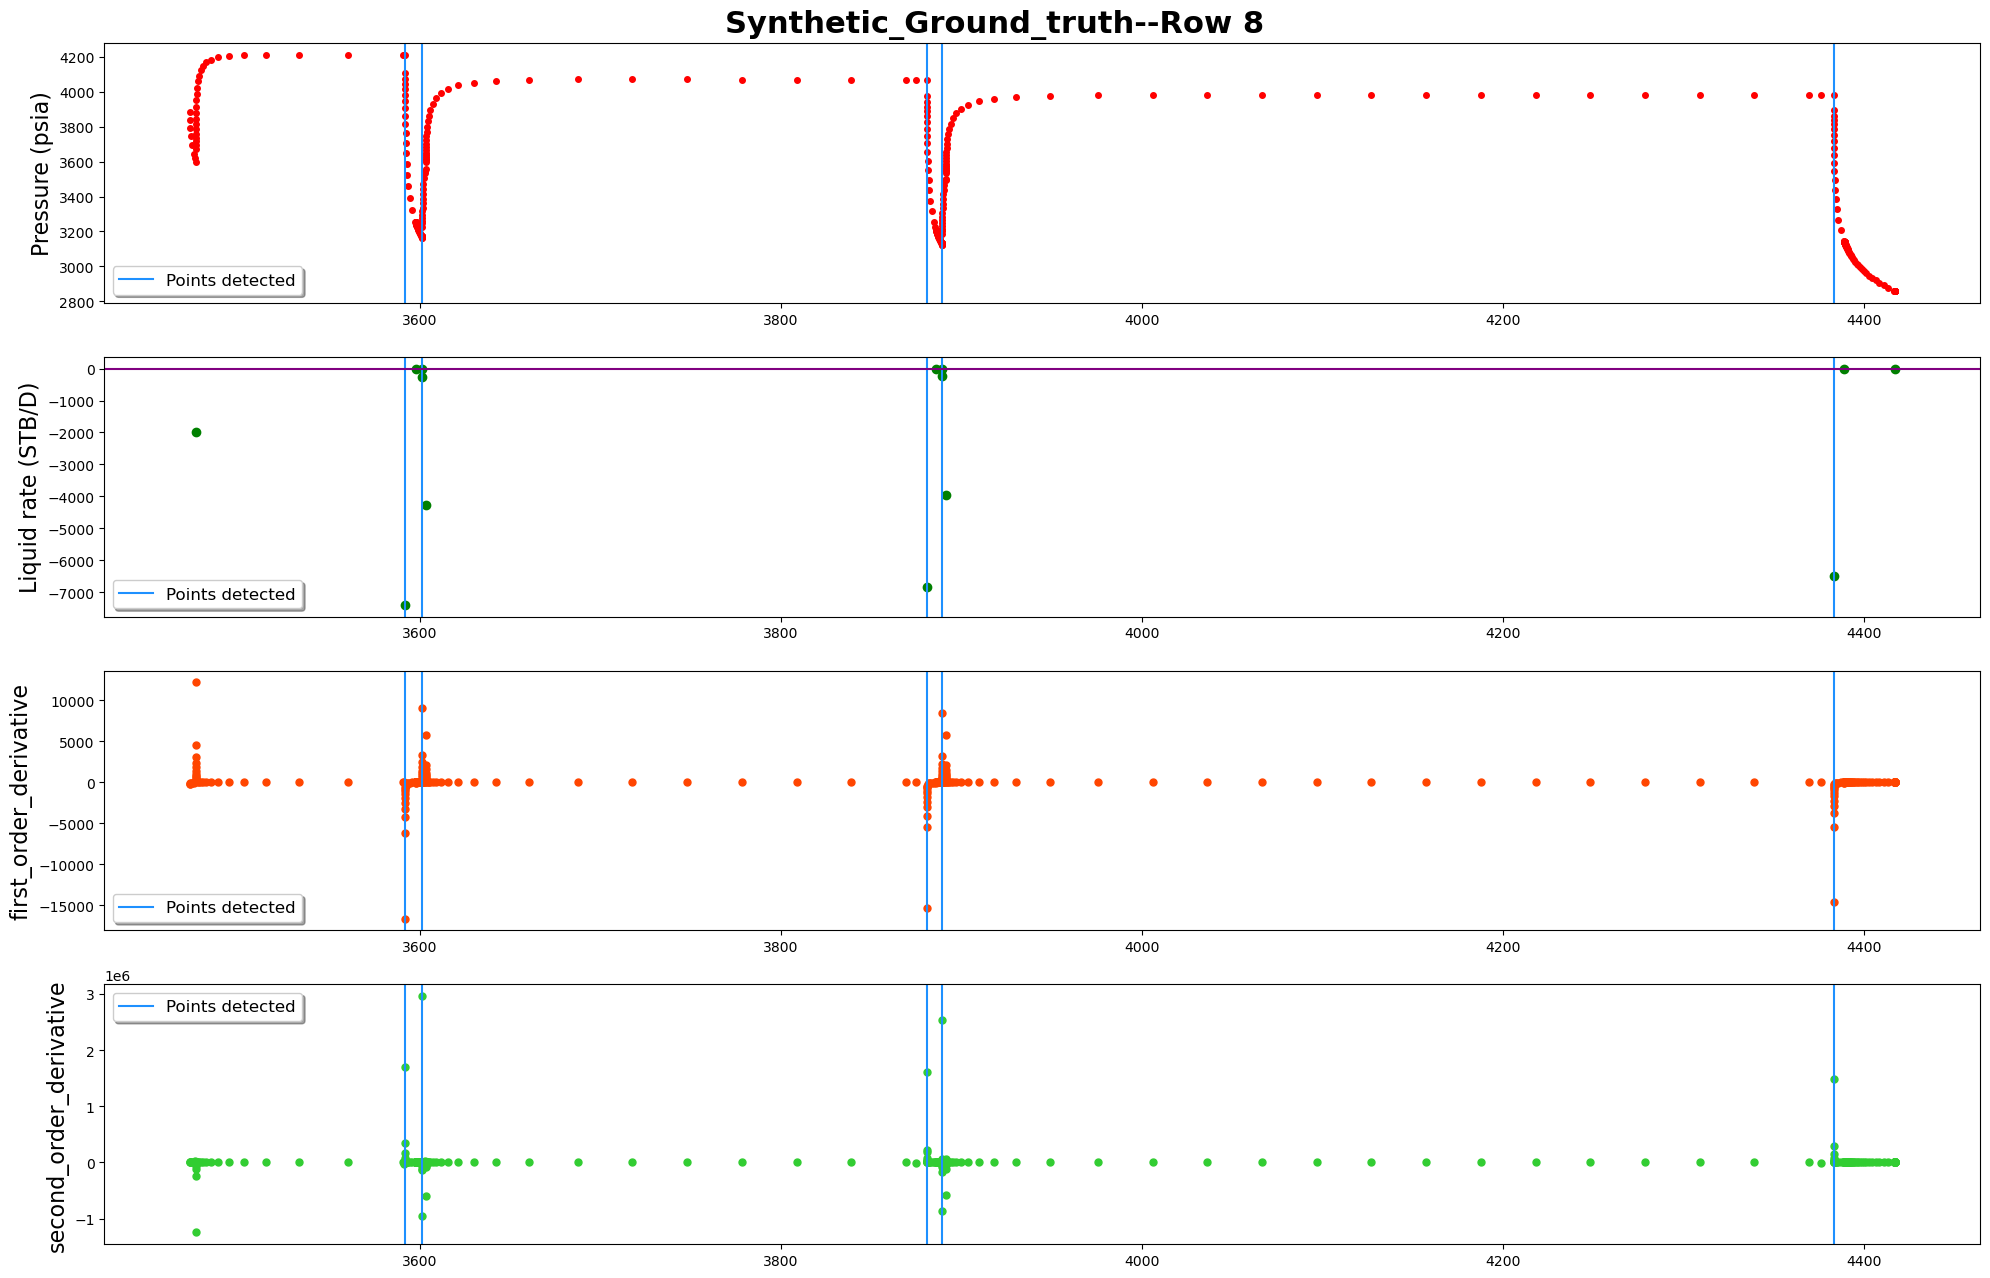

------row 9-----detected points:[3240, 3284, 3368, 3411]


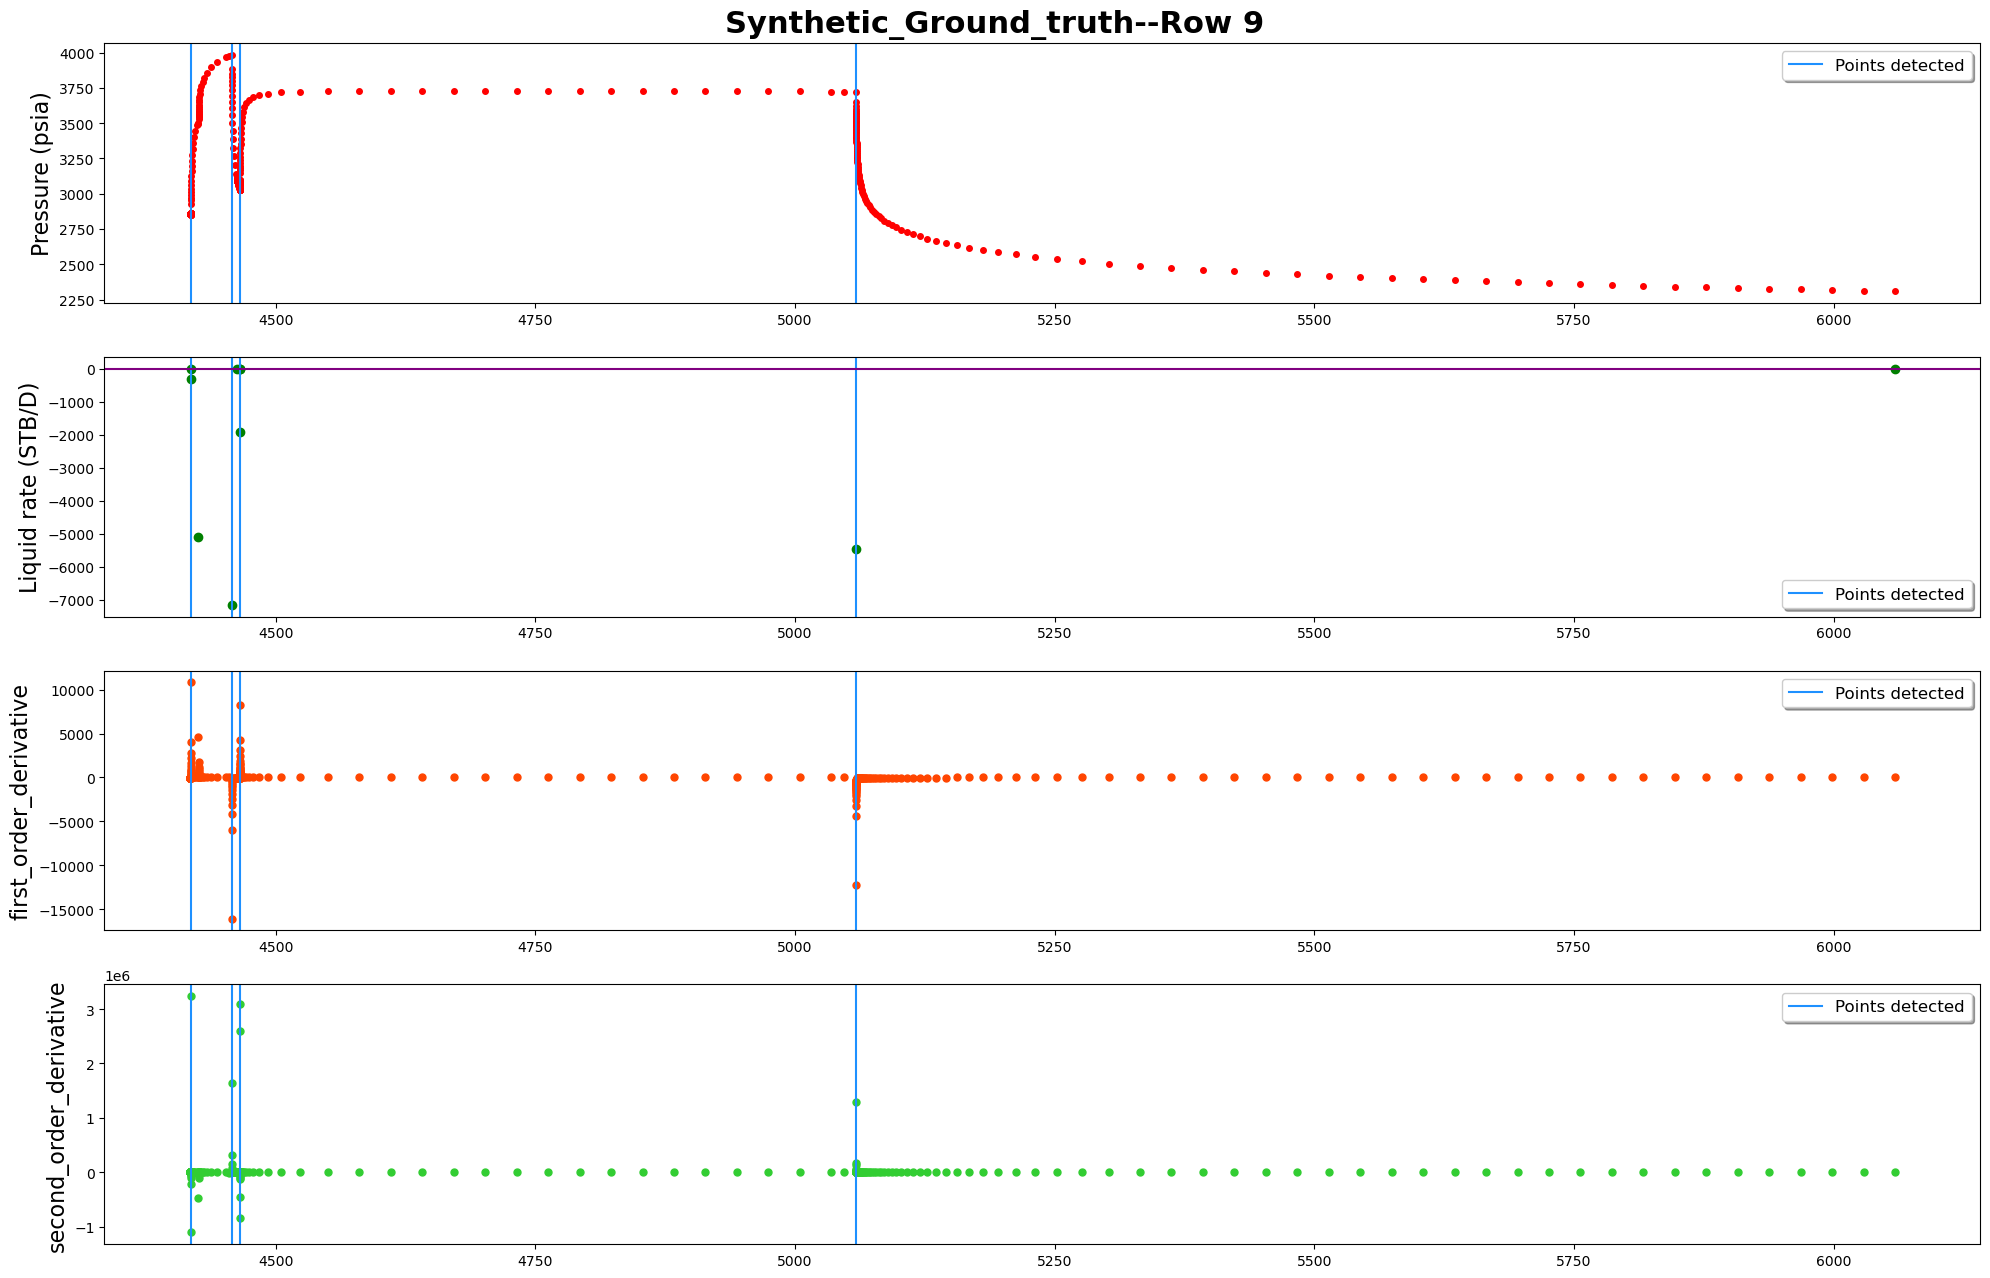

PermissionError: [Errno 13] Permission denied: '../data_output/Synthetic_Ground_truth.pdf'

In [9]:
#save and plot ground truth breakpoints
filename_toSave="../data_output/Synthetic_Ground_truth.pdf"
plot_name="Synthetic_Ground_truth"
plot_whole=False
plot_details=True
plot_statistics=False
PlotNSave(pressure_df,
          rate_df,
          ground_truth,
          [],
          data_inOneRow,
          plot_name,
          filename_toSave,
          plot_statistics,
          plot_whole,
          plot_details,
          colum_names)

In [ ]:
# data=pressure_df["first_order_derivative"]
# xlabel="first_order_derivative"
# ylabel="count"
# title='histogram--synthetic data'
# plot_histogram(data, xlabel, ylabel,title)

In [ ]:
#startPoint2
noise_threshold=2.9
breakpoints_detected_startPoint2=detect_breakpoints_startPoint2(first_order_derivative,second_order_derivative,noise_threshold)
#plot & save
filename_toSave="../data_output/Synthetic_Start_point_method.pdf"
plot_name="Synthetic_Start_point_method"
plot_whole=True
plot_details=True
plot_statistics=True
PlotNSave(pressure_df,
          rate_df,
          breakpoints_detected_startPoint2,
          ground_truth,
          data_inOneRow,
          plot_name,
          filename_toSave,
          plot_statistics,
          plot_whole,
          plot_details,
          colum_names)

In [ ]:
breakpoints_detected=detect_breakpoints(first_order_derivative)
print(len(breakpoints_detected))

In [ ]:
#baseline method
breakpoints_detected_baseline2=detect_breakpoints_2(first_order_derivative,second_order_derivative)
print("len(breakpoints_detected)",len(breakpoints_detected))

#plot & save
filename_toSave="../data_output/Synthetic_Baseline_method.pdf"
plot_name="Synthetic_Baseline_method"
plot_whole=True
plot_details=True
plot_statistics=True
PlotNSave(pressure_df,
          rate_df,
          breakpoints_detected_baseline2,
          ground_truth,
          data_inOneRow,
          plot_name,
          filename_toSave,
          plot_statistics,
          plot_whole,
          plot_details,
          colum_names)

In [ ]:
# breakpoints_detected=detect_breakpoints_3(first_order_derivative,second_order_derivative)
# print(len(breakpoints_detected))
# print(breakpoints_detected)


In [ ]:
import shapely.geometry as sg
import matplotlib.pyplot as plt
import descartes

# create the circles with shapely
a = sg.Point(-.2,0).buffer(1.)
b = sg.Point(0.2,0).buffer(1.)

# compute the 3 parts
left = a.difference(b)
right = b.difference(a)
middle = a.intersection(b)

# use descartes to create the matplotlib patches
#'dodgerblue','fuchsia',  'gold'
ax = plt.gca()
ax.add_patch(descartes.PolygonPatch(right, fc='gold', ec='b'))
ax.add_patch(descartes.PolygonPatch(left, fc='fuchsia', ec='b'))
ax.add_patch(descartes.PolygonPatch(middle, fc='dodgerblue', ec='b'))

# control display
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
ax.set_aspect('equal')
plt.show()

In [ ]:
import shapely.geometry as sg
import matplotlib.pyplot as plt
import descartes

# create the circles with shapely
a = sg.Point(-.2,0).buffer(1.)
b = sg.Point(0.02,0).buffer(0.8)

# compute the 3 parts
left = a.difference(b)
right = b.difference(a)
middle = a.intersection(b)

# use descartes to create the matplotlib patches
#'dodgerblue','fuchsia',  'gold'
ax = plt.gca()
ax.add_patch(descartes.PolygonPatch(right, fc='gold', ec='b'))
ax.add_patch(descartes.PolygonPatch(left, fc='fuchsia', ec='b'))
ax.add_patch(descartes.PolygonPatch(middle, fc='dodgerblue', ec='b'))

# control display
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
ax.set_aspect('equal')
plt.show()

# Synthetic data from alexey

In [ ]:
import pickle
with open(r"../data_input/2022-02-03_C5_synthetic_dataset/C5.pkl", "rb") as f:
    df, df_units, df_info = pickle.load(f)
    
df = df.reset_index()
df.drop(columns = ['WSTAT_W1', 'FPR'], inplace=True)
#df.rename(columns={'TIME': 'days', 'YEARS': 'years', 'TIMESTEP': 'dt', 'WBHP_W1': 'p', 'WWIR_W1': 'q'}, inplace=True)
df.head()

In [ ]:
# x_coordinate=df["TIME"]
# y_coordinate=df["WBHP_W1"]
# first_order_derivative=calculate_derivative(x_coordinate,y_coordinate)
# second_order_derivative=calculate_derivative(x_coordinate,first_order_derivative)
# df["first_order_derivative"]=first_order_derivative
# df["second_order_derivative"]=second_order_derivative
# df

In [ ]:
df['dp'] = df['WBHP_W1'].diff()
df["first_order_derivative"] = np.nan
# the derivative is shiftet by one step earlier (i.e. the forward derivative)!
df["first_order_derivative"].iloc[0:-1] = df['dp'].iloc[1:]/df['TIMESTEP'].iloc[1:]
df["first_order_derivative"].iloc[-1]=df["first_order_derivative"].iloc[-2]

In [ ]:
df

In [ ]:
df['dp_2'] = df["first_order_derivative"].diff()
df["second_order_derivative"] = np.nan
# the derivative is shiftet by one step earlier (i.e. the forward derivative)!
df["second_order_derivative"].iloc[0:-1] = df['dp_2'].iloc[1:]/df['TIMESTEP'].iloc[1:]
df["second_order_derivative"].iloc[-1]=df["second_order_derivative"].iloc[-2]
df

In [ ]:
std_1=statistics.stdev(df["first_order_derivative"])
std_1
std_2=statistics.stdev(df["second_order_derivative"])
std_2

In [ ]:
df['dt'] = df["TIME"].diff()
df

In [ ]:
df.loc[df["TIMESTEP"]==0]
df.loc[df["dt"]==0]

In [ ]:
df["TIME"].iloc[18518:18535] 

In [ ]:
df.describe()

In [ ]:
#day convert to hour
df["TIME"]=df["TIME"]*24
df["TIMESTEP"]=df["TIMESTEP"]*24
df

In [ ]:
colum_names={"pressure":{"time":"TIME",
                        "measure":"WBHP_W1",
                        "first_order_derivative":"dp/dt",
                        "second_order_derivative":"dp/dt_2"},
             "rate":{"time":"TIME",
                     "measure":"WWIR_W1"}}
data_inOneRow=1200
ground_truth=[]

In [ ]:
#baseline method
first_order_derivative=df["first_order_derivative"]
second_order_derivative=df["second_order_derivative"]
breakpoints_detected_baseline2=detect_breakpoints_2(first_order_derivative,second_order_derivative)
print("len(breakpoints_detected)",len(breakpoints_detected_baseline2))

In [ ]:
#baseline method
breakpoints_detected_baseline2=detect_breakpoints_2(first_order_derivative,second_order_derivative)
print("len(breakpoints_detected)",len(breakpoints_detected_baseline2))

#plot & save
filename_toSave="../data_output/Synthetic_Baseline_method_Alexey.pdf"
plot_name="Synthetic_Baseline_method"
plot_whole=True
plot_details=True
plot_statistics=True
PlotNSave(df,
          df,
          breakpoints_detected_baseline2,
          ground_truth,
          data_inOneRow,
          plot_name,
          filename_toSave,
          plot_statistics,
          plot_whole,
          plot_details,
          colum_names)

In [ ]:
#baseline method
noise_threshold=2
breakpoints_detected_baseline2=detect_breakpoints_3(first_order_derivative,second_order_derivative,noise_threshold)
print("len(breakpoints_detected)",len(breakpoints_detected_baseline2))

In [ ]:
#plot & save
filename_toSave="../data_output/Synthetic_Baseline_method_Alexey.pdf"
plot_name="Synthetic_Baseline_method"
plot_whole=True
plot_details=True
plot_statistics=True
PlotNSave(df,
          df,
          breakpoints_detected_baseline2,
          ground_truth,
          data_inOneRow,
          plot_name,
          filename_toSave,
          plot_statistics,
          plot_whole,
          plot_details,
          colum_names)

In [ ]:
# noise_threshold=1
# breakpoints_detected=detect_breakpoints_startPoint2(first_order_derivative,second_order_derivative,noise_threshold)
# print(len(detected_points))

# filename_toSave=""
# plot_name="Synthetic_Baseline_method"
# plot_whole=True
# plot_details=True
# plot_statistics=True
# PlotNSave(df,
#           df,
#           breakpoints_detected,
#           ground_truth,
#           data_inOneRow,
#           plot_name,
#           filename_toSave,
#           plot_statistics,
#           plot_whole,
#           plot_details,
#           colum_names)